### aim: 

### date: 

In [70]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [71]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [72]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'monospace',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [73]:
def make_yearlist(yrst, yrend, tr, baseDir = '/gpfs/home/mep22dku/scratch/SOZONE/ecosystemLooks/depthint-ptrc'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/TOM12_TJ_{tr}-ptrc-{yrs[i]}.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist



Text(0.5, 1.0, 'latitudinal bands, \n Arctic = 1, Subarctic = 2 & so on, SO = 6')

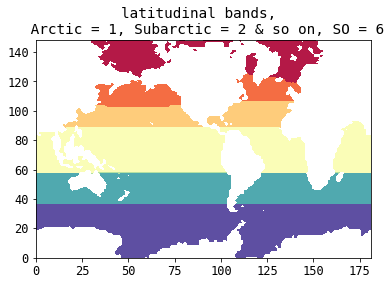

In [74]:
regs = ['ARCTIC', 'P1', 'P2', 'P3', 'P4', 'P5', 'A1', 'A2', 'A3', 'A4', 'A5', 'I3', 'I4', 'I5']

regdict = {'ARCTIC' : {'number' : 0.5},
           'P1' : {'number': 1.0},
          'P2' : {'number': 1.2},
           'P3' : {'number': 1.4},
           'P4' : {'number': 1.6},
           'P5' : {'number': 1.8},
            'A1' : {'number': 2.4},
          'A2' : {'number': 2.6},
           'A3' : {'number': 2.8},
           'A4' : {'number': 3},
           'A5' : {'number': 3.2},
           'I3' : {'number': 3.6},
           'I4' : {'number': 3.8},
           'I5' : {'number': 4},
           
          }
    
tics = []
tcm = 'Spectral'
tmask = nc.Dataset('/gpfs/data/greenocean/software/resources/breakdown/clq_basin_masks_ORCA.nc')

maskno = np.zeros([149,182])
for i in range(0, len(regs)):
    maskno[tmask[regs[i]][:] == 1] = regdict[regs[i]]['number']
    tics.append(regdict[regs[i]]['number'])
maskno[maskno == 0] = np.nan

# w = plt.pcolor(maskno, cmap = tcm, vmin = 0.5, vmax = 4)
# cbar = plt.colorbar(w, ticks=tics)
# t = cbar.ax.set_yticklabels(['ARCTIC', 'P1', 'P2', 'P3', 'P4', 'P5', 'A1', 'A2', 'A3', 'A4', 'A5', 'I3', 'I4', 'I5'], fontsize = 9)
# plt.suptitle('original ocean regions, subdivided')

# fact = 0.2
# #fig = plt.figure(figsize=(30*fact,15*fact))
# import matplotlib
# cmap = matplotlib.cm.get_cmap('Spectral')
# norm = matplotlib.colors.Normalize(vmin=0.5, vmax=4)
# for i in range(0,len(regs)):
#     rgba = cmap(norm(regdict[regs[i]]['number']))
#     #plt.plot(regdict[regs[i]]['number'], 1, marker = 'o', color = rgba, label = regs[i])
#     regdict[regs[i]]['colour'] = rgba
# # plt.legend(ncol = 5, fontsize = 10)
# # plt.suptitle('check that norm of colours works')

plt.figure()
mask_latbands = np.copy(maskno)

mask_latbands[maskno == 0.5] = 1
mask_latbands[(maskno == 1) | (maskno == 2.4)] = 2
mask_latbands[(maskno == 1.2) | (maskno == 2.6)] = 3
mask_latbands[(maskno == 1.4) | (maskno == 2.8) | (maskno == 3.6)] = 4
mask_latbands[(maskno == 1.6) | (maskno == 3.0) | (maskno == 3.8)] = 5
mask_latbands[(maskno == 1.8) | (maskno == 3.2) | (maskno == 4.0)] = 6
import matplotlib
cmap = matplotlib.cm.get_cmap('Spectral')
w = plt.contourf(mask_latbands, vmin = 1, vmax = 6, cmap = cmap)
plt.title('latitudinal bands, \n Arctic = 1, Subarctic = 2 & so on, SO = 6')
#plt.colorbar(w)

In [75]:
p1AA6 = xr.open_mfdataset(make_yearlist(1950,2099,'1AA6'))
p1BA6 = xr.open_mfdataset(make_yearlist(1950,2099,'1BA6'))
p1ASA = xr.open_mfdataset(make_yearlist(1950,2099,'1ASA'))
p1BSA = xr.open_mfdataset(make_yearlist(1950,2099,'1BSA'))

In [76]:
plot = False
if plot:
    fact = 0.9
    fig, axs = plt.subplots(6,2, figsize=(15*fact, 17*fact), facecolor='w', edgecolor='k')
    axs = axs.ravel()

    tits = ['Arctic, 1A (low temp)', 'Arctic, 1B (high temp)',\
           'Subarctic, 1A (low temp)', 'Subarctic, 1B (high temp)',
           'North. Midlats, 1A (low temp)', 'North. Midlats, 1B (high temp)',
           'South. Midlats, 1A (low temp)', 'South. Midlats, 1B (high temp)',
           'Northern SO, 1A (low temp)', 'Northern SO, 1B (high temp)',
           'Southern Ocean, 1A (low temp)', 'Southern Ocean, 1B (high temp)',]

    for i in range(0,12):
        axs[i].grid()
        axs[i].set_xlim([1950,2099])
        axs[i].set_title(tits[i])

    for i in range(1,7):
        print(f'{i}1')
        DIA1 = p1AA6.DIA.sel(lat_band = i).groupby('time_counter.year').mean()
        year = DIA1.year.values
        DIA = p1AA6.DIA.sel(lat_band = i).groupby('time_counter.year').mean().values
        MIX = p1AA6.MIX.sel(lat_band = i).groupby('time_counter.year').mean().values
        COC = p1AA6.COC.sel(lat_band = i).groupby('time_counter.year').mean().values
        PHA = p1AA6.PHA.sel(lat_band = i).groupby('time_counter.year').mean().values
        FIX = p1AA6.FIX.sel(lat_band = i).groupby('time_counter.year').mean().values
        PIC = p1AA6.PIC.sel(lat_band = i).groupby('time_counter.year').mean().values
        BAC = p1AA6.BAC.sel(lat_band = i).groupby('time_counter.year').mean().values
        

        axs[(i-1)*2].plot(year,DIA, color = 'darkorchid', label = 'DIA')
        axs[(i-1)*2].plot(year,DIA+MIX, color = 'mediumblue', label = 'MIX')
        axs[(i-1)*2].plot(year,DIA+MIX+COC, color = 'steelblue', label = 'COC')
        axs[(i-1)*2].plot(year,DIA+MIX+COC+PHA, color = 'limegreen', label = 'PHA')
        axs[(i-1)*2].plot(year,DIA+MIX+COC+PHA+FIX, color = 'y', label = 'FIX')
        axs[(i-1)*2].plot(year,DIA+MIX+COC+PHA+FIX+PIC, color = 'orange', label = 'PIC')
        axs[(i-1)*2].plot(year,DIA+MIX+COC+PHA+FIX+PIC+BAC, color = 'r', label = 'BAC')

        axs[(i-1)*2].fill_between(year,DIA, 0, color = 'darkorchid', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,DIA+MIX, DIA, color = 'mediumblue', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,DIA+MIX+COC, DIA+MIX, color = 'steelblue', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,DIA+MIX+COC+PHA, DIA+MIX+COC, color = 'limegreen', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,DIA+MIX+COC+PHA+FIX, DIA+MIX+COC+PHA, color = 'y', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,DIA+MIX+COC+PHA+FIX+PIC, DIA+MIX+COC+PHA+FIX, color = 'orange', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,DIA+MIX+COC+PHA+FIX+PIC+BAC, DIA+MIX+COC+PHA+FIX+PIC, color = 'r', alpha = 0.2)

    for i in range(1,7):
        print(f'{i}2')
        DIA1 = p1BA6.DIA.sel(lat_band = i).groupby('time_counter.year').mean()
        year = DIA1.year.values
        DIA = p1BA6.DIA.sel(lat_band = i).groupby('time_counter.year').mean().values
        MIX = p1BA6.MIX.sel(lat_band = i).groupby('time_counter.year').mean().values
        COC = p1BA6.COC.sel(lat_band = i).groupby('time_counter.year').mean().values
        PHA = p1BA6.PHA.sel(lat_band = i).groupby('time_counter.year').mean().values
        FIX = p1BA6.FIX.sel(lat_band = i).groupby('time_counter.year').mean().values
        PIC = p1BA6.PIC.sel(lat_band = i).groupby('time_counter.year').mean().values
        BAC = p1BA6.BAC.sel(lat_band = i).groupby('time_counter.year').mean().values


        axs[(i-1)*2+1].plot(year,DIA, color = 'darkorchid', label = 'DIA')
        axs[(i-1)*2+1].plot(year,DIA+MIX, color = 'mediumblue', label = 'MIX')
        axs[(i-1)*2+1].plot(year,DIA+MIX+COC, color = 'steelblue', label = 'COC')
        axs[(i-1)*2+1].plot(year,DIA+MIX+COC+PHA, color = 'limegreen', label = 'PHA')
        axs[(i-1)*2+1].plot(year,DIA+MIX+COC+PHA+FIX, color = 'y', label = 'FIX')
        axs[(i-1)*2+1].plot(year,DIA+MIX+COC+PHA+FIX+PIC, color = 'orange', label = 'PIC')
        axs[(i-1)*2+1].plot(year,DIA+MIX+COC+PHA+FIX+PIC+BAC, color = 'r', label = 'BAC')

        axs[(i-1)*2+1].fill_between(year,DIA, 0, color = 'darkorchid', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,DIA+MIX, DIA, color = 'mediumblue', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,DIA+MIX+COC, DIA+MIX, color = 'steelblue', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,DIA+MIX+COC+PHA, DIA+MIX+COC, color = 'limegreen', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,DIA+MIX+COC+PHA+FIX, DIA+MIX+COC+PHA, color = 'y', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,DIA+MIX+COC+PHA+FIX+PIC, DIA+MIX+COC+PHA+FIX, color = 'orange', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,DIA+MIX+COC+PHA+FIX+PIC+BAC, DIA+MIX+COC+PHA+FIX+PIC, color = 'r', alpha = 0.2)


        
        
    axs[2].legend(ncol = 3, loc = 'best', fontsize = 10)

    plt.suptitle('A6 series (CAL12)', fontsize = 18)
    plt.tight_layout()
    fig.savefig('./plots/Phyto-A6.jpg')

In [77]:
plot = False
if plot:
    fact = 0.9
    fig, axs = plt.subplots(6,2, figsize=(15*fact, 17*fact), facecolor='w', edgecolor='k')
    axs = axs.ravel()

    tits = ['Arctic, 1A (low temp)', 'Arctic, 1B (high temp)',\
           'Subarctic, 1A (low temp)', 'Subarctic, 1B (high temp)',
           'North. Midlats, 1A (low temp)', 'North. Midlats, 1B (high temp)',
           'South. Midlats, 1A (low temp)', 'South. Midlats, 1B (high temp)',
           'Northern SO, 1A (low temp)', 'Northern SO, 1B (high temp)',
           'Southern Ocean, 1A (low temp)', 'Southern Ocean, 1B (high temp)',]

    for i in range(0,12):
        axs[i].grid()
        axs[i].set_xlim([1950,2099])
        axs[i].set_title(tits[i])

    for i in range(1,7):
        print(f'{i}1')
        DIA1 = p1ASA.DIA.sel(lat_band = i).groupby('time_counter.year').mean()
        year = DIA1.year.values
        DIA = p1ASA.DIA.sel(lat_band = i).groupby('time_counter.year').mean().values
        MIX = p1ASA.MIX.sel(lat_band = i).groupby('time_counter.year').mean().values
        COC = p1ASA.COC.sel(lat_band = i).groupby('time_counter.year').mean().values
        PHA = p1ASA.PHA.sel(lat_band = i).groupby('time_counter.year').mean().values
        FIX = p1ASA.FIX.sel(lat_band = i).groupby('time_counter.year').mean().values
        PIC = p1ASA.PIC.sel(lat_band = i).groupby('time_counter.year').mean().values
        BAC = p1ASA.BAC.sel(lat_band = i).groupby('time_counter.year').mean().values
        

        axs[(i-1)*2].plot(year,DIA, color = 'darkorchid', label = 'DIA')
        axs[(i-1)*2].plot(year,DIA+MIX, color = 'mediumblue', label = 'MIX')
        axs[(i-1)*2].plot(year,DIA+MIX+COC, color = 'steelblue', label = 'COC')
        axs[(i-1)*2].plot(year,DIA+MIX+COC+PHA, color = 'limegreen', label = 'PHA')
        axs[(i-1)*2].plot(year,DIA+MIX+COC+PHA+FIX, color = 'y', label = 'FIX')
        axs[(i-1)*2].plot(year,DIA+MIX+COC+PHA+FIX+PIC, color = 'orange', label = 'PIC')
        axs[(i-1)*2].plot(year,DIA+MIX+COC+PHA+FIX+PIC+BAC, color = 'r', label = 'BAC')

        axs[(i-1)*2].fill_between(year,DIA, 0, color = 'darkorchid', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,DIA+MIX, DIA, color = 'mediumblue', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,DIA+MIX+COC, DIA+MIX, color = 'steelblue', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,DIA+MIX+COC+PHA, DIA+MIX+COC, color = 'limegreen', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,DIA+MIX+COC+PHA+FIX, DIA+MIX+COC+PHA, color = 'y', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,DIA+MIX+COC+PHA+FIX+PIC, DIA+MIX+COC+PHA+FIX, color = 'orange', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,DIA+MIX+COC+PHA+FIX+PIC+BAC, DIA+MIX+COC+PHA+FIX+PIC, color = 'r', alpha = 0.2)

    for i in range(1,7):
        print(f'{i}2')
        DIA1 = p1BSA.DIA.sel(lat_band = i).groupby('time_counter.year').mean()
        year = DIA1.year.values
        DIA = p1BSA.DIA.sel(lat_band = i).groupby('time_counter.year').mean().values
        MIX = p1BSA.MIX.sel(lat_band = i).groupby('time_counter.year').mean().values
        COC = p1BSA.COC.sel(lat_band = i).groupby('time_counter.year').mean().values
        PHA = p1BSA.PHA.sel(lat_band = i).groupby('time_counter.year').mean().values
        FIX = p1BSA.FIX.sel(lat_band = i).groupby('time_counter.year').mean().values
        PIC = p1BSA.PIC.sel(lat_band = i).groupby('time_counter.year').mean().values
        BAC = p1BSA.BAC.sel(lat_band = i).groupby('time_counter.year').mean().values


        axs[(i-1)*2+1].plot(year,DIA, color = 'darkorchid', label = 'DIA')
        axs[(i-1)*2+1].plot(year,DIA+MIX, color = 'mediumblue', label = 'MIX')
        axs[(i-1)*2+1].plot(year,DIA+MIX+COC, color = 'steelblue', label = 'COC')
        axs[(i-1)*2+1].plot(year,DIA+MIX+COC+PHA, color = 'limegreen', label = 'PHA')
        axs[(i-1)*2+1].plot(year,DIA+MIX+COC+PHA+FIX, color = 'y', label = 'FIX')
        axs[(i-1)*2+1].plot(year,DIA+MIX+COC+PHA+FIX+PIC, color = 'orange', label = 'PIC')
        axs[(i-1)*2+1].plot(year,DIA+MIX+COC+PHA+FIX+PIC+BAC, color = 'r', label = 'BAC')

        axs[(i-1)*2+1].fill_between(year,DIA, 0, color = 'darkorchid', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,DIA+MIX, DIA, color = 'mediumblue', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,DIA+MIX+COC, DIA+MIX, color = 'steelblue', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,DIA+MIX+COC+PHA, DIA+MIX+COC, color = 'limegreen', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,DIA+MIX+COC+PHA+FIX, DIA+MIX+COC+PHA, color = 'y', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,DIA+MIX+COC+PHA+FIX+PIC, DIA+MIX+COC+PHA+FIX, color = 'orange', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,DIA+MIX+COC+PHA+FIX+PIC+BAC, DIA+MIX+COC+PHA+FIX+PIC, color = 'r', alpha = 0.2)


        
        
    axs[2].legend(ncol = 3, loc = 'best', fontsize = 10)

    plt.suptitle('SA series (DW GCB2022-ish series)', fontsize = 18)
    plt.tight_layout()
    fig.savefig('./plots/Phyto-SA.jpg')

In [78]:
p1AA6

<xarray.Dataset>
Dimensions:       (lat_band: 6, time_counter: 1800)
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 1950-01-01 ... 2099-12-01
  * lat_band      (lat_band) int64 1 2 3 4 5 6
Data variables:
    Alkalini      (time_counter, lat_band) float64 dask.array<chunksize=(12, 6), meta=np.ndarray>
    O2            (time_counter, lat_band) float64 dask.array<chunksize=(12, 6), meta=np.ndarray>
    DIC           (time_counter, lat_band) float64 dask.array<chunksize=(12, 6), meta=np.ndarray>
    PIIC          (time_counter, lat_band) float64 dask.array<chunksize=(12, 6), meta=np.ndarray>
    DOC           (time_counter, lat_band) float64 dask.array<chunksize=(12, 6), meta=np.ndarray>
    CaCO3         (time_counter, lat_band) float64 dask.array<chunksize=(12, 6), meta=np.ndarray>
    ARA           (time_counter, lat_band) float64 dask.array<chunksize=(12, 6), meta=np.ndarray>
    POC           (time_counter, lat_band) float64 dask.array<chunksize=(12, 6), meta=np.ndarray>
    GOC           (time_counter, lat_band) float64 dask.array<chunksize=(12, 6), meta=np.ndarray>
    NO3           (time_counter, lat_band) float64 dask.array<chunksize=(12, 6), meta=np.ndarray>
    Si            (time_counter, lat_band) float64 dask.array<chunksize=(12, 6), meta=np.ndarray>
    PO4           (time_counter, lat_band) float64 dask.array<chunksize=(12, 6), meta=np.ndarray>
    Fer           (time_counter, lat_band) float64 dask.array<chunksize=(12, 6), meta=np.ndarray>
    DIA           (time_counter, lat_band) float64 dask.array<chunksize=(12, 6), meta=np.ndarray>
    MIX           (time_counter, lat_band) float64 dask.array<chunksize=(12, 6), meta=np.ndarray>
    COC           (time_counter, lat_band) float64 dask.array<chunksize=(12, 6), meta=np.ndarray>
    PIC           (time_counter, lat_band) float64 dask.array<chunksize=(12, 6), meta=np.ndarray>
    PHA           (time_counter, lat_band) float64 dask.array<chunksize=(12, 6), meta=np.ndarray>
    FIX           (time_counter, lat_band) float64 dask.array<chunksize=(12, 6), meta=np.ndarray>
    BAC           (time_counter, lat_band) float64 dask.array<chunksize=(12, 6), meta=np.ndarray>
    PRO           (time_counter, lat_band) float64 dask.array<chunksize=(12, 6), meta=np.ndarray>
    PTE           (time_counter, lat_band) float64 dask.array<chunksize=(12, 6), meta=np.ndarray>
    MES           (time_counter, lat_band) float64 dask.array<chunksize=(12, 6), meta=np.ndarray>
    GEL           (time_counter, lat_band) float64 dask.array<chunksize=(12, 6), meta=np.ndarray>
    MAC           (time_counter, lat_band) float64 dask.array<chunksize=(12, 6), meta=np.ndarray>
Attributes:
    made in:         SOZONE/ecosystemLooks/fxlgroups-intime.ipynb
    latitude bands:  see notebook, 1 is arctic, 6 is SO

In [79]:
plot = False
if plot:
    fact = 0.9
    fig, axs = plt.subplots(6,2, figsize=(15*fact, 17*fact), facecolor='w', edgecolor='k')
    axs = axs.ravel()

    tits = ['Arctic, 1A (low temp)', 'Arctic, 1B (high temp)',\
           'Subarctic, 1A (low temp)', 'Subarctic, 1B (high temp)',
           'North. Midlats, 1A (low temp)', 'North. Midlats, 1B (high temp)',
           'South. Midlats, 1A (low temp)', 'South. Midlats, 1B (high temp)',
           'Northern SO, 1A (low temp)', 'Northern SO, 1B (high temp)',
           'Southern Ocean, 1A (low temp)', 'Southern Ocean, 1B (high temp)',]

    for i in range(0,12):
        axs[i].grid()
        axs[i].set_xlim([1950,2099])
        axs[i].set_title(tits[i])

    for i in range(1,7):
        print(f'{i}1')
        DIA1 = p1AA6.DIA.sel(lat_band = i).groupby('time_counter.year').mean()
        year = DIA1.year.values
        DIA = p1AA6.DIA.sel(lat_band = i).groupby('time_counter.year').mean().values
        MIX = p1AA6.MIX.sel(lat_band = i).groupby('time_counter.year').mean().values
        COC = p1AA6.COC.sel(lat_band = i).groupby('time_counter.year').mean().values
        PHA = p1AA6.PHA.sel(lat_band = i).groupby('time_counter.year').mean().values
        FIX = p1AA6.FIX.sel(lat_band = i).groupby('time_counter.year').mean().values
        PIC = p1AA6.PIC.sel(lat_band = i).groupby('time_counter.year').mean().values
        BAC = p1AA6.BAC.sel(lat_band = i).groupby('time_counter.year').mean().values
        

        axs[(i-1)*2].plot(year,DIA, color = 'darkorchid', label = 'DIA')
        axs[(i-1)*2].plot(year,DIA+MIX, color = 'mediumblue', label = 'MIX')
        axs[(i-1)*2].plot(year,DIA+MIX+COC, color = 'steelblue', label = 'COC')
        axs[(i-1)*2].plot(year,DIA+MIX+COC+PHA, color = 'limegreen', label = 'PHA')
        axs[(i-1)*2].plot(year,DIA+MIX+COC+PHA+FIX, color = 'y', label = 'FIX')
        axs[(i-1)*2].plot(year,DIA+MIX+COC+PHA+FIX+PIC, color = 'orange', label = 'PIC')
        axs[(i-1)*2].plot(year,DIA+MIX+COC+PHA+FIX+PIC+BAC, color = 'r', label = 'BAC')

        axs[(i-1)*2].fill_between(year,DIA, 0, color = 'darkorchid', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,DIA+MIX, DIA, color = 'mediumblue', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,DIA+MIX+COC, DIA+MIX, color = 'steelblue', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,DIA+MIX+COC+PHA, DIA+MIX+COC, color = 'limegreen', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,DIA+MIX+COC+PHA+FIX, DIA+MIX+COC+PHA, color = 'y', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,DIA+MIX+COC+PHA+FIX+PIC, DIA+MIX+COC+PHA+FIX, color = 'orange', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,DIA+MIX+COC+PHA+FIX+PIC+BAC, DIA+MIX+COC+PHA+FIX+PIC, color = 'r', alpha = 0.2)

    for i in range(1,7):
        print(f'{i}2')
        DIA1 = p1BA6.DIA.sel(lat_band = i).groupby('time_counter.year').mean()
        year = DIA1.year.values
        DIA = p1BA6.DIA.sel(lat_band = i).groupby('time_counter.year').mean().values
        MIX = p1BA6.MIX.sel(lat_band = i).groupby('time_counter.year').mean().values
        COC = p1BA6.COC.sel(lat_band = i).groupby('time_counter.year').mean().values
        PHA = p1BA6.PHA.sel(lat_band = i).groupby('time_counter.year').mean().values
        FIX = p1BA6.FIX.sel(lat_band = i).groupby('time_counter.year').mean().values
        PIC = p1BA6.PIC.sel(lat_band = i).groupby('time_counter.year').mean().values
        BAC = p1BA6.BAC.sel(lat_band = i).groupby('time_counter.year').mean().values


        axs[(i-1)*2+1].plot(year,DIA, color = 'darkorchid', label = 'DIA')
        axs[(i-1)*2+1].plot(year,DIA+MIX, color = 'mediumblue', label = 'MIX')
        axs[(i-1)*2+1].plot(year,DIA+MIX+COC, color = 'steelblue', label = 'COC')
        axs[(i-1)*2+1].plot(year,DIA+MIX+COC+PHA, color = 'limegreen', label = 'PHA')
        axs[(i-1)*2+1].plot(year,DIA+MIX+COC+PHA+FIX, color = 'y', label = 'FIX')
        axs[(i-1)*2+1].plot(year,DIA+MIX+COC+PHA+FIX+PIC, color = 'orange', label = 'PIC')
        axs[(i-1)*2+1].plot(year,DIA+MIX+COC+PHA+FIX+PIC+BAC, color = 'r', label = 'BAC')

        axs[(i-1)*2+1].fill_between(year,DIA, 0, color = 'darkorchid', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,DIA+MIX, DIA, color = 'mediumblue', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,DIA+MIX+COC, DIA+MIX, color = 'steelblue', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,DIA+MIX+COC+PHA, DIA+MIX+COC, color = 'limegreen', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,DIA+MIX+COC+PHA+FIX, DIA+MIX+COC+PHA, color = 'y', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,DIA+MIX+COC+PHA+FIX+PIC, DIA+MIX+COC+PHA+FIX, color = 'orange', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,DIA+MIX+COC+PHA+FIX+PIC+BAC, DIA+MIX+COC+PHA+FIX+PIC, color = 'r', alpha = 0.2)


        
        
    axs[2].legend(ncol = 3, loc = 'best', fontsize = 10)

    plt.suptitle('A6 series (CAL12)', fontsize = 18)
    plt.tight_layout()
    fig.savefig('./plots/Phyto-A6.jpg')

In [80]:
plot = False
if plot:
    fact = 0.9
    fig, axs = plt.subplots(6,2, figsize=(15*fact, 17*fact), facecolor='w', edgecolor='k')
    axs = axs.ravel()

    tits = ['Arctic, 1A (low temp)', 'Arctic, 1B (high temp)',\
           'Subarctic, 1A (low temp)', 'Subarctic, 1B (high temp)',
           'North. Midlats, 1A (low temp)', 'North. Midlats, 1B (high temp)',
           'South. Midlats, 1A (low temp)', 'South. Midlats, 1B (high temp)',
           'Northern SO, 1A (low temp)', 'Northern SO, 1B (high temp)',
           'Southern Ocean, 1A (low temp)', 'Southern Ocean, 1B (high temp)',]

    for i in range(0,12):
        axs[i].grid()
        axs[i].set_xlim([1950,2099])
        axs[i].set_title(tits[i])

    for i in range(1,7):
        print(f'{i}1')
        PRO1 = p1AA6.PRO.sel(lat_band = i).groupby('time_counter.year').mean()
        year = PRO1.year.values
        PRO = p1AA6.PRO.sel(lat_band = i).groupby('time_counter.year').mean().values
        PTE = p1AA6.PTE.sel(lat_band = i).groupby('time_counter.year').mean().values
        MES = p1AA6.MES.sel(lat_band = i).groupby('time_counter.year').mean().values
        GEL = p1AA6.GEL.sel(lat_band = i).groupby('time_counter.year').mean().values
        MAC = p1AA6.MAC.sel(lat_band = i).groupby('time_counter.year').mean().values
        BAC = p1AA6.BAC.sel(lat_band = i).groupby('time_counter.year').mean().values
        

        axs[(i-1)*2].plot(year,PRO, color = 'darkorchid', label = 'PRO')
        axs[(i-1)*2].plot(year,PRO+PTE, color = 'mediumblue', label = 'PTE')
        axs[(i-1)*2].plot(year,PRO+PTE+MES, color = 'steelblue', label = 'MES')
        axs[(i-1)*2].plot(year,PRO+PTE+MES+GEL, color = 'limegreen', label = 'GEL')
        axs[(i-1)*2].plot(year,PRO+PTE+MES+GEL+MAC, color = 'y', label = 'MAC')
        axs[(i-1)*2].plot(year,PRO+PTE+MES+GEL+MAC+BAC, color = 'r', label = 'BAC')

        axs[(i-1)*2].fill_between(year,PRO, 0, color = 'darkorchid', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,PRO+PTE, PRO, color = 'mediumblue', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,PRO+PTE+MES, PRO+PTE, color = 'steelblue', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,PRO+PTE+MES+GEL, PRO+PTE+MES, color = 'limegreen', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,PRO+PTE+MES+GEL+MAC, PRO+PTE+MES+GEL, color = 'y', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,PRO+PTE+MES+GEL+MAC+BAC, PRO+PTE+MES+GEL+MAC, color = 'r', alpha = 0.2)

    for i in range(1,7):
        print(f'{i}2')
        PRO1 = p1BA6.PRO.sel(lat_band = i).groupby('time_counter.year').mean()
        year = PRO1.year.values
        PRO = p1BA6.PRO.sel(lat_band = i).groupby('time_counter.year').mean().values
        PTE = p1BA6.PTE.sel(lat_band = i).groupby('time_counter.year').mean().values
        MES = p1BA6.MES.sel(lat_band = i).groupby('time_counter.year').mean().values
        GEL = p1BA6.GEL.sel(lat_band = i).groupby('time_counter.year').mean().values
        MAC = p1BA6.MAC.sel(lat_band = i).groupby('time_counter.year').mean().values
        BAC = p1BA6.BAC.sel(lat_band = i).groupby('time_counter.year').mean().values
        

        axs[(i-1)*2+1].plot(year,PRO, color = 'darkorchid', label = 'PRO')
        axs[(i-1)*2+1].plot(year,PRO+PTE, color = 'mediumblue', label = 'PTE')
        axs[(i-1)*2+1].plot(year,PRO+PTE+MES, color = 'steelblue', label = 'MES')
        axs[(i-1)*2+1].plot(year,PRO+PTE+MES+GEL, color = 'limegreen', label = 'GEL')
        axs[(i-1)*2+1].plot(year,PRO+PTE+MES+GEL+MAC, color = 'y', label = 'MAC')
        axs[(i-1)*2+1].plot(year,PRO+PTE+MES+GEL+MAC+BAC, color = 'r', label = 'BAC')

        axs[(i-1)*2+1].fill_between(year,PRO, 0, color = 'darkorchid', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,PRO+PTE, PRO, color = 'mediumblue', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,PRO+PTE+MES, PRO+PTE, color = 'steelblue', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,PRO+PTE+MES+GEL, PRO+PTE+MES, color = 'limegreen', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,PRO+PTE+MES+GEL+MAC, PRO+PTE+MES+GEL, color = 'y', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,PRO+PTE+MES+GEL+MAC+BAC, PRO+PTE+MES+GEL+MAC, color = 'r', alpha = 0.2)



        
        
    axs[2].legend(ncol = 3, loc = 'best', fontsize = 10)

    plt.suptitle('A6 series (CAL12)', fontsize = 18)
    plt.tight_layout()
    fig.savefig('./plots/Zoo-A6.jpg')

In [81]:
plot = False
if plot:
    fact = 0.9
    fig, axs = plt.subplots(6,2, figsize=(15*fact, 17*fact), facecolor='w', edgecolor='k')
    axs = axs.ravel()

    tits = ['Arctic, 1A (low temp)', 'Arctic, 1B (high temp)',\
           'Subarctic, 1A (low temp)', 'Subarctic, 1B (high temp)',
           'North. Midlats, 1A (low temp)', 'North. Midlats, 1B (high temp)',
           'South. Midlats, 1A (low temp)', 'South. Midlats, 1B (high temp)',
           'Northern SO, 1A (low temp)', 'Northern SO, 1B (high temp)',
           'Southern Ocean, 1A (low temp)', 'Southern Ocean, 1B (high temp)',]

    for i in range(0,12):
        axs[i].grid()
        axs[i].set_xlim([1950,2099])
        axs[i].set_title(tits[i])

    for i in range(1,7):
        print(f'{i}1')
        PRO1 = p1ASA.PRO.sel(lat_band = i).groupby('time_counter.year').mean()
        year = PRO1.year.values
        PRO = p1ASA.PRO.sel(lat_band = i).groupby('time_counter.year').mean().values
        PTE = p1ASA.PTE.sel(lat_band = i).groupby('time_counter.year').mean().values
        MES = p1ASA.MES.sel(lat_band = i).groupby('time_counter.year').mean().values
        GEL = p1ASA.GEL.sel(lat_band = i).groupby('time_counter.year').mean().values
        MAC = p1ASA.MAC.sel(lat_band = i).groupby('time_counter.year').mean().values
        BAC = p1ASA.BAC.sel(lat_band = i).groupby('time_counter.year').mean().values
        

        axs[(i-1)*2].plot(year,PRO, color = 'darkorchid', label = 'PRO')
        axs[(i-1)*2].plot(year,PRO+PTE, color = 'mediumblue', label = 'PTE')
        axs[(i-1)*2].plot(year,PRO+PTE+MES, color = 'steelblue', label = 'MES')
        axs[(i-1)*2].plot(year,PRO+PTE+MES+GEL, color = 'limegreen', label = 'GEL')
        axs[(i-1)*2].plot(year,PRO+PTE+MES+GEL+MAC, color = 'y', label = 'MAC')
        axs[(i-1)*2].plot(year,PRO+PTE+MES+GEL+MAC+BAC, color = 'r', label = 'BAC')

        axs[(i-1)*2].fill_between(year,PRO, 0, color = 'darkorchid', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,PRO+PTE, PRO, color = 'mediumblue', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,PRO+PTE+MES, PRO+PTE, color = 'steelblue', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,PRO+PTE+MES+GEL, PRO+PTE+MES, color = 'limegreen', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,PRO+PTE+MES+GEL+MAC, PRO+PTE+MES+GEL, color = 'y', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,PRO+PTE+MES+GEL+MAC+BAC, PRO+PTE+MES+GEL+MAC, color = 'r', alpha = 0.2)

    for i in range(1,7):
        print(f'{i}2')
        PRO1 = p1BSA.PRO.sel(lat_band = i).groupby('time_counter.year').mean()
        year = PRO1.year.values
        PRO = p1BSA.PRO.sel(lat_band = i).groupby('time_counter.year').mean().values
        PTE = p1BSA.PTE.sel(lat_band = i).groupby('time_counter.year').mean().values
        MES = p1BSA.MES.sel(lat_band = i).groupby('time_counter.year').mean().values
        GEL = p1BSA.GEL.sel(lat_band = i).groupby('time_counter.year').mean().values
        MAC = p1BSA.MAC.sel(lat_band = i).groupby('time_counter.year').mean().values
        BAC = p1BSA.BAC.sel(lat_band = i).groupby('time_counter.year').mean().values
        

        axs[(i-1)*2+1].plot(year,PRO, color = 'darkorchid', label = 'PRO')
        axs[(i-1)*2+1].plot(year,PRO+PTE, color = 'mediumblue', label = 'PTE')
        axs[(i-1)*2+1].plot(year,PRO+PTE+MES, color = 'steelblue', label = 'MES')
        axs[(i-1)*2+1].plot(year,PRO+PTE+MES+GEL, color = 'limegreen', label = 'GEL')
        axs[(i-1)*2+1].plot(year,PRO+PTE+MES+GEL+MAC, color = 'y', label = 'MAC')
        axs[(i-1)*2+1].plot(year,PRO+PTE+MES+GEL+MAC+BAC, color = 'r', label = 'BAC')

        axs[(i-1)*2+1].fill_between(year,PRO, 0, color = 'darkorchid', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,PRO+PTE, PRO, color = 'mediumblue', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,PRO+PTE+MES, PRO+PTE, color = 'steelblue', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,PRO+PTE+MES+GEL, PRO+PTE+MES, color = 'limegreen', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,PRO+PTE+MES+GEL+MAC, PRO+PTE+MES+GEL, color = 'y', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,PRO+PTE+MES+GEL+MAC+BAC, PRO+PTE+MES+GEL+MAC, color = 'r', alpha = 0.2)



        
        
    axs[2].legend(ncol = 3, loc = 'best', fontsize = 10)

    plt.suptitle('SA series (DW-GCB2022ish)', fontsize = 18)
    plt.tight_layout()
    fig.savefig('./plots/Zoo-SA.jpg')

###

- seasonality by band (1990-1999) to (2090-2099)
- primary productivity 

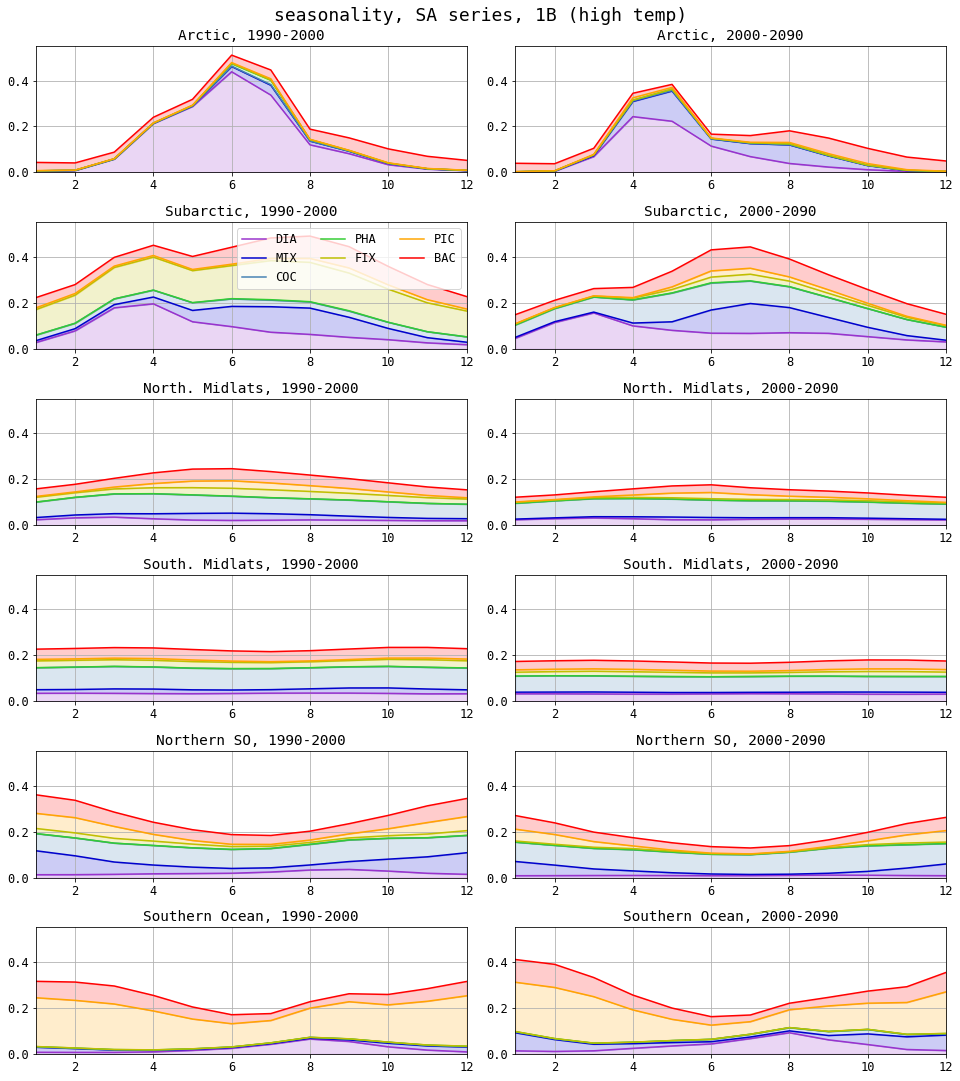

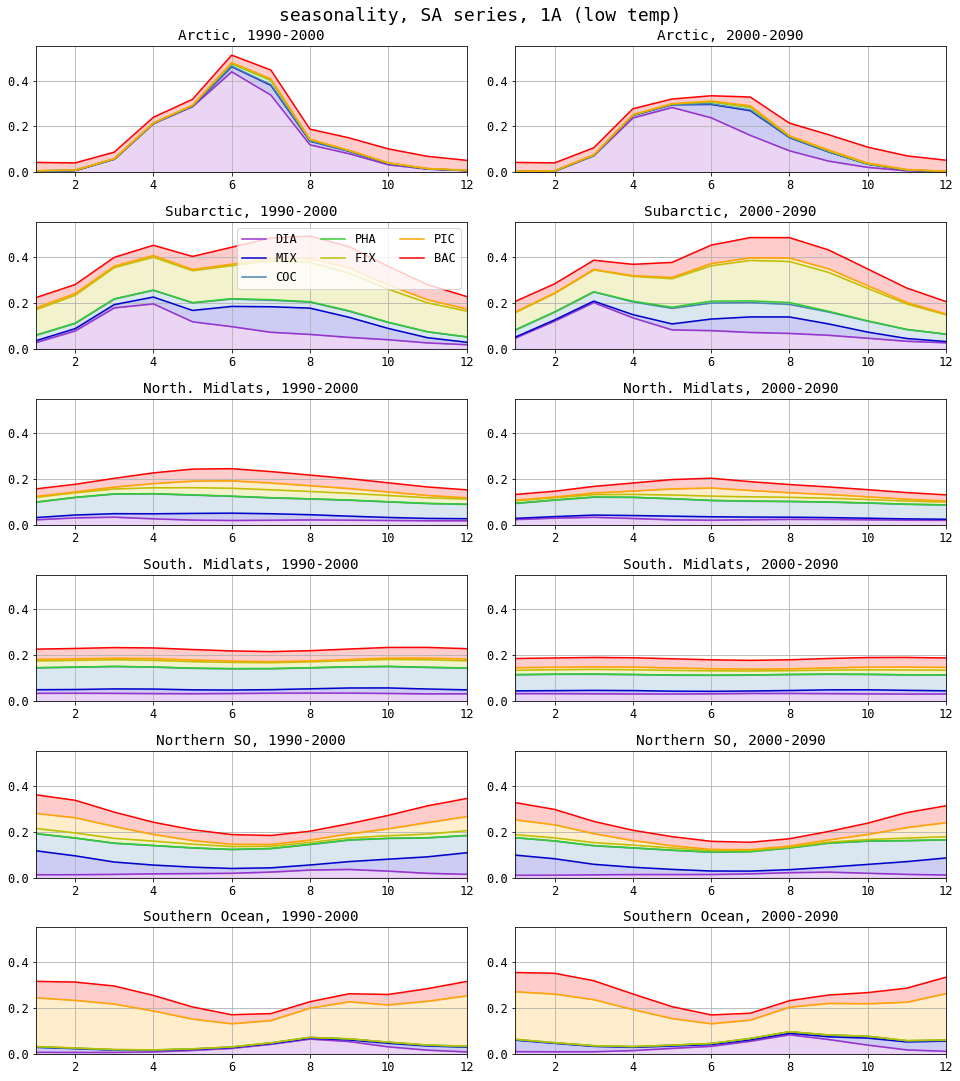

In [82]:
plot = True
stit = 'seasonality, SA series, 1B (high temp)'
ftit = 'seasonality-1BSA'
p1BSA_1990 = p1BSA.sel(time_counter=slice(f'1990-01-01', f'1999-12-31')).groupby('time_counter.month').mean()
p1BSA_2090 = p1BSA.sel(time_counter=slice(f'2090-01-01', f'2099-12-31')).groupby('time_counter.month').mean()

if plot:
    fact = 0.9
    fig, axs = plt.subplots(6,2, figsize=(15*fact, 17*fact), facecolor='w', edgecolor='k')
    axs = axs.ravel()

    tits = ['Arctic, 1990-2000', 'Arctic, 2000-2090',\
           'Subarctic, 1990-2000', 'Subarctic, 2000-2090',
           'North. Midlats, 1990-2000', 'North. Midlats, 2000-2090',
           'South. Midlats, 1990-2000', 'South. Midlats, 2000-2090',
           'Northern SO, 1990-2000', 'Northern SO, 2000-2090',
           'Southern Ocean, 1990-2000', 'Southern Ocean, 2000-2090',]

    for w in range(0,12):
        axs[w].grid()
        axs[w].set_xlim([1,12])
        axs[w].set_ylim([0,0.55])
        axs[w].set_title(tits[w])
        
    for i in range(1,7):
        year = p1BSA_1990.month ## terrible syntax lol
        DIA = p1BSA_1990.DIA.sel(lat_band = i).values
        MIX = p1BSA_1990.MIX.sel(lat_band = i).values
        COC = p1BSA_1990.COC.sel(lat_band = i).values
        PHA = p1BSA_1990.PHA.sel(lat_band = i).values
        FIX = p1BSA_1990.FIX.sel(lat_band = i).values
        PIC = p1BSA_1990.PIC.sel(lat_band = i).values
        BAC = p1BSA_1990.BAC.sel(lat_band = i).values
        
        axs[(i-1)*2].plot(year,DIA, color = 'darkorchid', label = 'DIA')
        axs[(i-1)*2].plot(year,DIA+MIX, color = 'mediumblue', label = 'MIX')
        axs[(i-1)*2].plot(year,DIA+MIX+COC, color = 'steelblue', label = 'COC')
        axs[(i-1)*2].plot(year,DIA+MIX+COC+PHA, color = 'limegreen', label = 'PHA')
        axs[(i-1)*2].plot(year,DIA+MIX+COC+PHA+FIX, color = 'y', label = 'FIX')
        axs[(i-1)*2].plot(year,DIA+MIX+COC+PHA+FIX+PIC, color = 'orange', label = 'PIC')
        axs[(i-1)*2].plot(year,DIA+MIX+COC+PHA+FIX+PIC+BAC, color = 'r', label = 'BAC')

        axs[(i-1)*2].fill_between(year,DIA, 0, color = 'darkorchid', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,DIA+MIX, DIA, color = 'mediumblue', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,DIA+MIX+COC, DIA+MIX, color = 'steelblue', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,DIA+MIX+COC+PHA, DIA+MIX+COC, color = 'limegreen', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,DIA+MIX+COC+PHA+FIX, DIA+MIX+COC+PHA, color = 'y', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,DIA+MIX+COC+PHA+FIX+PIC, DIA+MIX+COC+PHA+FIX, color = 'orange', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,DIA+MIX+COC+PHA+FIX+PIC+BAC, DIA+MIX+COC+PHA+FIX+PIC, color = 'r', alpha = 0.2)

    for i in range(1,7):
        year = p1BSA_2090.month ## terrible syntax lol
        DIA = p1BSA_2090.DIA.sel(lat_band = i).values
        MIX = p1BSA_2090.MIX.sel(lat_band = i).values
        COC = p1BSA_2090.COC.sel(lat_band = i).values
        PHA = p1BSA_2090.PHA.sel(lat_band = i).values
        FIX = p1BSA_2090.FIX.sel(lat_band = i).values
        PIC = p1BSA_2090.PIC.sel(lat_band = i).values
        BAC = p1BSA_2090.BAC.sel(lat_band = i).values
        
        axs[(i-1)*2+1].plot(year,DIA, color = 'darkorchid', label = 'DIA')
        axs[(i-1)*2+1].plot(year,DIA+MIX, color = 'mediumblue', label = 'MIX')
        axs[(i-1)*2+1].plot(year,DIA+MIX+COC, color = 'steelblue', label = 'COC')
        axs[(i-1)*2+1].plot(year,DIA+MIX+COC+PHA, color = 'limegreen', label = 'PHA')
        axs[(i-1)*2+1].plot(year,DIA+MIX+COC+PHA+FIX, color = 'y', label = 'FIX')
        axs[(i-1)*2+1].plot(year,DIA+MIX+COC+PHA+FIX+PIC, color = 'orange', label = 'PIC')
        axs[(i-1)*2+1].plot(year,DIA+MIX+COC+PHA+FIX+PIC+BAC, color = 'r', label = 'BAC')

        axs[(i-1)*2+1].fill_between(year,DIA, 0, color = 'darkorchid', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,DIA+MIX, DIA, color = 'mediumblue', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,DIA+MIX+COC, DIA+MIX, color = 'steelblue', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,DIA+MIX+COC+PHA, DIA+MIX+COC, color = 'limegreen', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,DIA+MIX+COC+PHA+FIX, DIA+MIX+COC+PHA, color = 'y', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,DIA+MIX+COC+PHA+FIX+PIC, DIA+MIX+COC+PHA+FIX, color = 'orange', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,DIA+MIX+COC+PHA+FIX+PIC+BAC, DIA+MIX+COC+PHA+FIX+PIC, color = 'r', alpha = 0.2)
    
    axs[2].legend(ncol = 3)
    plt.suptitle(stit, fontsize = 18)
    plt.tight_layout()
    fig.savefig(f'./plots/{ftit}.jpg')
    
stit = 'seasonality, SA series, 1A (low temp)'
ftit = 'seasonality-1ASA'
p1ASA_1990 = p1ASA.sel(time_counter=slice(f'1990-01-01', f'1999-12-31')).groupby('time_counter.month').mean()
p1ASA_2090 = p1ASA.sel(time_counter=slice(f'2090-01-01', f'2099-12-31')).groupby('time_counter.month').mean()

if plot:
    fact = 0.9
    fig, axs = plt.subplots(6,2, figsize=(15*fact, 17*fact), facecolor='w', edgecolor='k')
    axs = axs.ravel()

    tits = ['Arctic, 1990-2000', 'Arctic, 2000-2090',\
           'Subarctic, 1990-2000', 'Subarctic, 2000-2090',
           'North. Midlats, 1990-2000', 'North. Midlats, 2000-2090',
           'South. Midlats, 1990-2000', 'South. Midlats, 2000-2090',
           'Northern SO, 1990-2000', 'Northern SO, 2000-2090',
           'Southern Ocean, 1990-2000', 'Southern Ocean, 2000-2090',]

    for w in range(0,12):
        axs[w].grid()
        axs[w].set_xlim([1,12])
        axs[w].set_ylim([0,0.55])
        axs[w].set_title(tits[w])
        
    for i in range(1,7):
        year = p1ASA_1990.month ## terrible syntax lol
        DIA = p1ASA_1990.DIA.sel(lat_band = i).values
        MIX = p1ASA_1990.MIX.sel(lat_band = i).values
        COC = p1ASA_1990.COC.sel(lat_band = i).values
        PHA = p1ASA_1990.PHA.sel(lat_band = i).values
        FIX = p1ASA_1990.FIX.sel(lat_band = i).values
        PIC = p1ASA_1990.PIC.sel(lat_band = i).values
        BAC = p1ASA_1990.BAC.sel(lat_band = i).values
        
        axs[(i-1)*2].plot(year,DIA, color = 'darkorchid', label = 'DIA')
        axs[(i-1)*2].plot(year,DIA+MIX, color = 'mediumblue', label = 'MIX')
        axs[(i-1)*2].plot(year,DIA+MIX+COC, color = 'steelblue', label = 'COC')
        axs[(i-1)*2].plot(year,DIA+MIX+COC+PHA, color = 'limegreen', label = 'PHA')
        axs[(i-1)*2].plot(year,DIA+MIX+COC+PHA+FIX, color = 'y', label = 'FIX')
        axs[(i-1)*2].plot(year,DIA+MIX+COC+PHA+FIX+PIC, color = 'orange', label = 'PIC')
        axs[(i-1)*2].plot(year,DIA+MIX+COC+PHA+FIX+PIC+BAC, color = 'r', label = 'BAC')

        axs[(i-1)*2].fill_between(year,DIA, 0, color = 'darkorchid', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,DIA+MIX, DIA, color = 'mediumblue', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,DIA+MIX+COC, DIA+MIX, color = 'steelblue', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,DIA+MIX+COC+PHA, DIA+MIX+COC, color = 'limegreen', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,DIA+MIX+COC+PHA+FIX, DIA+MIX+COC+PHA, color = 'y', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,DIA+MIX+COC+PHA+FIX+PIC, DIA+MIX+COC+PHA+FIX, color = 'orange', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,DIA+MIX+COC+PHA+FIX+PIC+BAC, DIA+MIX+COC+PHA+FIX+PIC, color = 'r', alpha = 0.2)

    for i in range(1,7):
        year = p1ASA_2090.month ## terrible syntax lol
        DIA = p1ASA_2090.DIA.sel(lat_band = i).values
        MIX = p1ASA_2090.MIX.sel(lat_band = i).values
        COC = p1ASA_2090.COC.sel(lat_band = i).values
        PHA = p1ASA_2090.PHA.sel(lat_band = i).values
        FIX = p1ASA_2090.FIX.sel(lat_band = i).values
        PIC = p1ASA_2090.PIC.sel(lat_band = i).values
        BAC = p1ASA_2090.BAC.sel(lat_band = i).values
        
        axs[(i-1)*2+1].plot(year,DIA, color = 'darkorchid', label = 'DIA')
        axs[(i-1)*2+1].plot(year,DIA+MIX, color = 'mediumblue', label = 'MIX')
        axs[(i-1)*2+1].plot(year,DIA+MIX+COC, color = 'steelblue', label = 'COC')
        axs[(i-1)*2+1].plot(year,DIA+MIX+COC+PHA, color = 'limegreen', label = 'PHA')
        axs[(i-1)*2+1].plot(year,DIA+MIX+COC+PHA+FIX, color = 'y', label = 'FIX')
        axs[(i-1)*2+1].plot(year,DIA+MIX+COC+PHA+FIX+PIC, color = 'orange', label = 'PIC')
        axs[(i-1)*2+1].plot(year,DIA+MIX+COC+PHA+FIX+PIC+BAC, color = 'r', label = 'BAC')

        axs[(i-1)*2+1].fill_between(year,DIA, 0, color = 'darkorchid', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,DIA+MIX, DIA, color = 'mediumblue', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,DIA+MIX+COC, DIA+MIX, color = 'steelblue', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,DIA+MIX+COC+PHA, DIA+MIX+COC, color = 'limegreen', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,DIA+MIX+COC+PHA+FIX, DIA+MIX+COC+PHA, color = 'y', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,DIA+MIX+COC+PHA+FIX+PIC, DIA+MIX+COC+PHA+FIX, color = 'orange', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,DIA+MIX+COC+PHA+FIX+PIC+BAC, DIA+MIX+COC+PHA+FIX+PIC, color = 'r', alpha = 0.2)
    
    axs[2].legend(ncol = 3)
    plt.suptitle(stit, fontsize = 18)
    plt.tight_layout()
    fig.savefig(f'./plots/{ftit}.jpg')

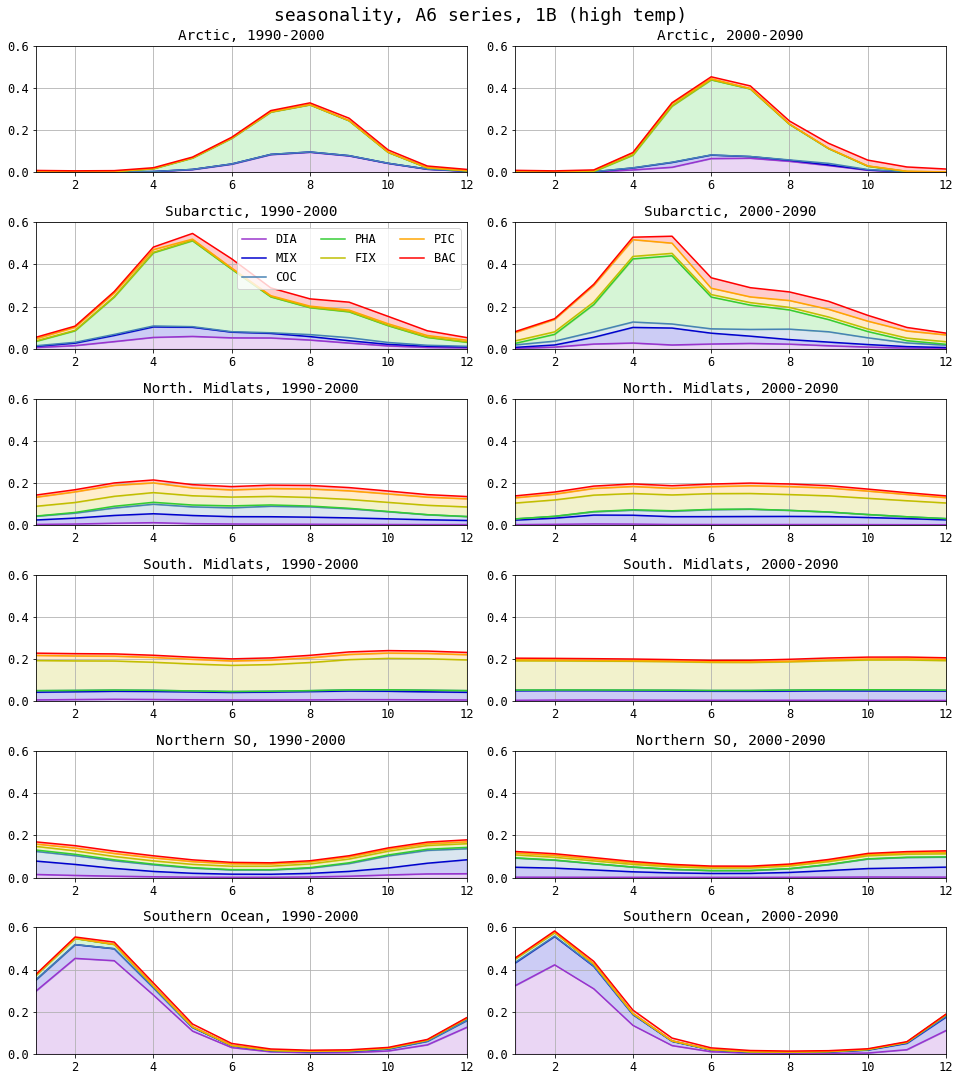

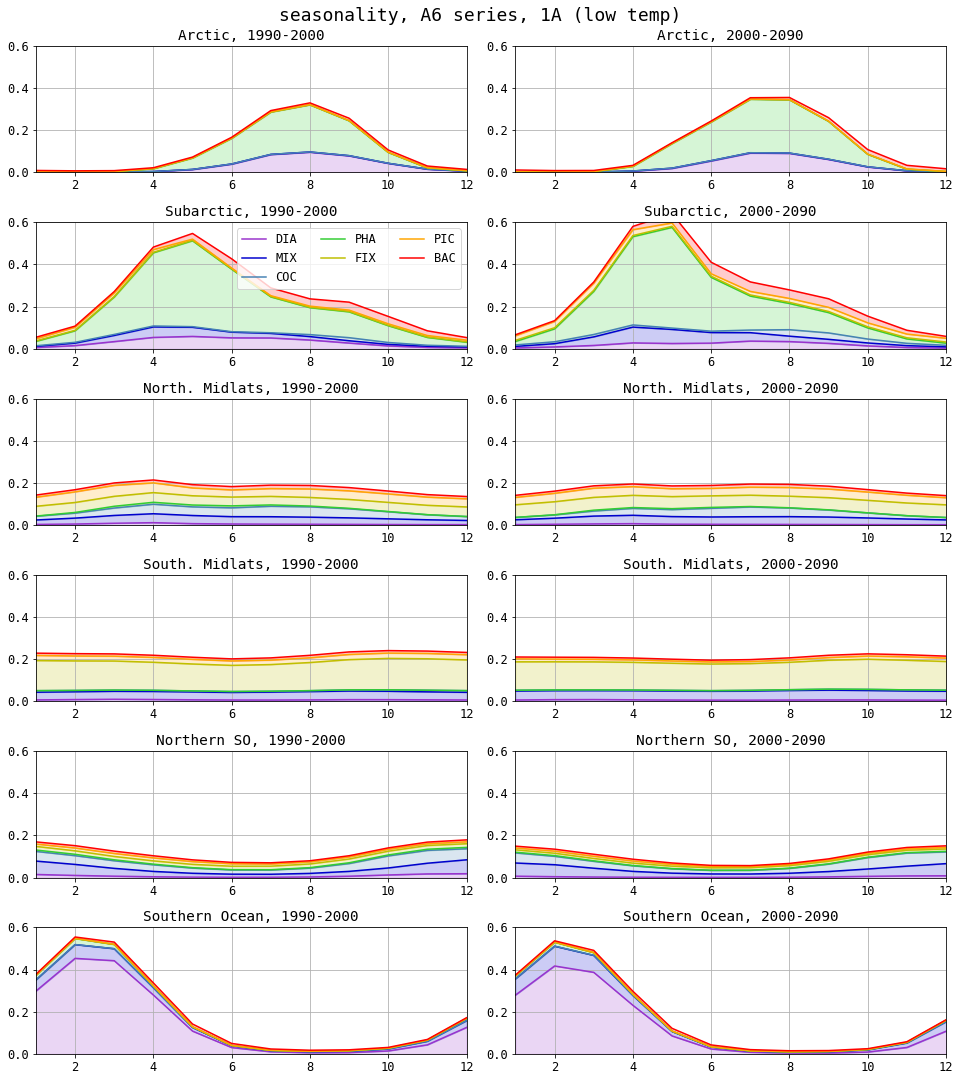

In [83]:
plot = True
stit = 'seasonality, A6 series, 1B (high temp)'
ftit = 'seasonality-1BA6'
p1BA6_1990 = p1BA6.sel(time_counter=slice(f'1990-01-01', f'1999-12-31')).groupby('time_counter.month').mean()
p1BA6_2090 = p1BA6.sel(time_counter=slice(f'2090-01-01', f'2099-12-31')).groupby('time_counter.month').mean()

if plot:
    fact = 0.9
    fig, axs = plt.subplots(6,2, figsize=(15*fact, 17*fact), facecolor='w', edgecolor='k')
    axs = axs.ravel()

    tits = ['Arctic, 1990-2000', 'Arctic, 2000-2090',\
           'Subarctic, 1990-2000', 'Subarctic, 2000-2090',
           'North. Midlats, 1990-2000', 'North. Midlats, 2000-2090',
           'South. Midlats, 1990-2000', 'South. Midlats, 2000-2090',
           'Northern SO, 1990-2000', 'Northern SO, 2000-2090',
           'Southern Ocean, 1990-2000', 'Southern Ocean, 2000-2090',]

    for w in range(0,12):
        axs[w].grid()
        axs[w].set_xlim([1,12])
        axs[w].set_ylim([0,0.6])
        axs[w].set_title(tits[w])
        
    for i in range(1,7):
        year = p1BA6_1990.month ## terrible syntax lol
        DIA = p1BA6_1990.DIA.sel(lat_band = i).values
        MIX = p1BA6_1990.MIX.sel(lat_band = i).values
        COC = p1BA6_1990.COC.sel(lat_band = i).values
        PHA = p1BA6_1990.PHA.sel(lat_band = i).values
        FIX = p1BA6_1990.FIX.sel(lat_band = i).values
        PIC = p1BA6_1990.PIC.sel(lat_band = i).values
        BAC = p1BA6_1990.BAC.sel(lat_band = i).values
        
        axs[(i-1)*2].plot(year,DIA, color = 'darkorchid', label = 'DIA')
        axs[(i-1)*2].plot(year,DIA+MIX, color = 'mediumblue', label = 'MIX')
        axs[(i-1)*2].plot(year,DIA+MIX+COC, color = 'steelblue', label = 'COC')
        axs[(i-1)*2].plot(year,DIA+MIX+COC+PHA, color = 'limegreen', label = 'PHA')
        axs[(i-1)*2].plot(year,DIA+MIX+COC+PHA+FIX, color = 'y', label = 'FIX')
        axs[(i-1)*2].plot(year,DIA+MIX+COC+PHA+FIX+PIC, color = 'orange', label = 'PIC')
        axs[(i-1)*2].plot(year,DIA+MIX+COC+PHA+FIX+PIC+BAC, color = 'r', label = 'BAC')

        axs[(i-1)*2].fill_between(year,DIA, 0, color = 'darkorchid', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,DIA+MIX, DIA, color = 'mediumblue', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,DIA+MIX+COC, DIA+MIX, color = 'steelblue', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,DIA+MIX+COC+PHA, DIA+MIX+COC, color = 'limegreen', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,DIA+MIX+COC+PHA+FIX, DIA+MIX+COC+PHA, color = 'y', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,DIA+MIX+COC+PHA+FIX+PIC, DIA+MIX+COC+PHA+FIX, color = 'orange', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,DIA+MIX+COC+PHA+FIX+PIC+BAC, DIA+MIX+COC+PHA+FIX+PIC, color = 'r', alpha = 0.2)

    for i in range(1,7):
        year = p1BA6_2090.month ## terrible syntax lol
        DIA = p1BA6_2090.DIA.sel(lat_band = i).values
        MIX = p1BA6_2090.MIX.sel(lat_band = i).values
        COC = p1BA6_2090.COC.sel(lat_band = i).values
        PHA = p1BA6_2090.PHA.sel(lat_band = i).values
        FIX = p1BA6_2090.FIX.sel(lat_band = i).values
        PIC = p1BA6_2090.PIC.sel(lat_band = i).values
        BAC = p1BA6_2090.BAC.sel(lat_band = i).values
        
        axs[(i-1)*2+1].plot(year,DIA, color = 'darkorchid', label = 'DIA')
        axs[(i-1)*2+1].plot(year,DIA+MIX, color = 'mediumblue', label = 'MIX')
        axs[(i-1)*2+1].plot(year,DIA+MIX+COC, color = 'steelblue', label = 'COC')
        axs[(i-1)*2+1].plot(year,DIA+MIX+COC+PHA, color = 'limegreen', label = 'PHA')
        axs[(i-1)*2+1].plot(year,DIA+MIX+COC+PHA+FIX, color = 'y', label = 'FIX')
        axs[(i-1)*2+1].plot(year,DIA+MIX+COC+PHA+FIX+PIC, color = 'orange', label = 'PIC')
        axs[(i-1)*2+1].plot(year,DIA+MIX+COC+PHA+FIX+PIC+BAC, color = 'r', label = 'BAC')

        axs[(i-1)*2+1].fill_between(year,DIA, 0, color = 'darkorchid', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,DIA+MIX, DIA, color = 'mediumblue', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,DIA+MIX+COC, DIA+MIX, color = 'steelblue', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,DIA+MIX+COC+PHA, DIA+MIX+COC, color = 'limegreen', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,DIA+MIX+COC+PHA+FIX, DIA+MIX+COC+PHA, color = 'y', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,DIA+MIX+COC+PHA+FIX+PIC, DIA+MIX+COC+PHA+FIX, color = 'orange', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,DIA+MIX+COC+PHA+FIX+PIC+BAC, DIA+MIX+COC+PHA+FIX+PIC, color = 'r', alpha = 0.2)
    
    axs[2].legend(ncol = 3)
    plt.suptitle(stit, fontsize = 18)
    plt.tight_layout()
    fig.savefig(f'./plots/{ftit}.jpg')
    
stit = 'seasonality, A6 series, 1A (low temp)'
ftit = 'seasonality-1AA6'
p1AA6_1990 = p1AA6.sel(time_counter=slice(f'1990-01-01', f'1999-12-31')).groupby('time_counter.month').mean()
p1AA6_2090 = p1AA6.sel(time_counter=slice(f'2090-01-01', f'2099-12-31')).groupby('time_counter.month').mean()

if plot:
    fact = 0.9
    fig, axs = plt.subplots(6,2, figsize=(15*fact, 17*fact), facecolor='w', edgecolor='k')
    axs = axs.ravel()

    tits = ['Arctic, 1990-2000', 'Arctic, 2000-2090',\
           'Subarctic, 1990-2000', 'Subarctic, 2000-2090',
           'North. Midlats, 1990-2000', 'North. Midlats, 2000-2090',
           'South. Midlats, 1990-2000', 'South. Midlats, 2000-2090',
           'Northern SO, 1990-2000', 'Northern SO, 2000-2090',
           'Southern Ocean, 1990-2000', 'Southern Ocean, 2000-2090',]

    for w in range(0,12):
        axs[w].grid()
        axs[w].set_xlim([1,12])
        axs[w].set_ylim([0,0.6])
        axs[w].set_title(tits[w])
        
    for i in range(1,7):
        year = p1AA6_1990.month ## terrible syntax lol
        DIA = p1AA6_1990.DIA.sel(lat_band = i).values
        MIX = p1AA6_1990.MIX.sel(lat_band = i).values
        COC = p1AA6_1990.COC.sel(lat_band = i).values
        PHA = p1AA6_1990.PHA.sel(lat_band = i).values
        FIX = p1AA6_1990.FIX.sel(lat_band = i).values
        PIC = p1AA6_1990.PIC.sel(lat_band = i).values
        BAC = p1AA6_1990.BAC.sel(lat_band = i).values
        
        axs[(i-1)*2].plot(year,DIA, color = 'darkorchid', label = 'DIA')
        axs[(i-1)*2].plot(year,DIA+MIX, color = 'mediumblue', label = 'MIX')
        axs[(i-1)*2].plot(year,DIA+MIX+COC, color = 'steelblue', label = 'COC')
        axs[(i-1)*2].plot(year,DIA+MIX+COC+PHA, color = 'limegreen', label = 'PHA')
        axs[(i-1)*2].plot(year,DIA+MIX+COC+PHA+FIX, color = 'y', label = 'FIX')
        axs[(i-1)*2].plot(year,DIA+MIX+COC+PHA+FIX+PIC, color = 'orange', label = 'PIC')
        axs[(i-1)*2].plot(year,DIA+MIX+COC+PHA+FIX+PIC+BAC, color = 'r', label = 'BAC')

        axs[(i-1)*2].fill_between(year,DIA, 0, color = 'darkorchid', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,DIA+MIX, DIA, color = 'mediumblue', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,DIA+MIX+COC, DIA+MIX, color = 'steelblue', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,DIA+MIX+COC+PHA, DIA+MIX+COC, color = 'limegreen', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,DIA+MIX+COC+PHA+FIX, DIA+MIX+COC+PHA, color = 'y', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,DIA+MIX+COC+PHA+FIX+PIC, DIA+MIX+COC+PHA+FIX, color = 'orange', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,DIA+MIX+COC+PHA+FIX+PIC+BAC, DIA+MIX+COC+PHA+FIX+PIC, color = 'r', alpha = 0.2)

    for i in range(1,7):
        year = p1AA6_2090.month ## terrible syntax lol
        DIA = p1AA6_2090.DIA.sel(lat_band = i).values
        MIX = p1AA6_2090.MIX.sel(lat_band = i).values
        COC = p1AA6_2090.COC.sel(lat_band = i).values
        PHA = p1AA6_2090.PHA.sel(lat_band = i).values
        FIX = p1AA6_2090.FIX.sel(lat_band = i).values
        PIC = p1AA6_2090.PIC.sel(lat_band = i).values
        BAC = p1AA6_2090.BAC.sel(lat_band = i).values
        
        axs[(i-1)*2+1].plot(year,DIA, color = 'darkorchid', label = 'DIA')
        axs[(i-1)*2+1].plot(year,DIA+MIX, color = 'mediumblue', label = 'MIX')
        axs[(i-1)*2+1].plot(year,DIA+MIX+COC, color = 'steelblue', label = 'COC')
        axs[(i-1)*2+1].plot(year,DIA+MIX+COC+PHA, color = 'limegreen', label = 'PHA')
        axs[(i-1)*2+1].plot(year,DIA+MIX+COC+PHA+FIX, color = 'y', label = 'FIX')
        axs[(i-1)*2+1].plot(year,DIA+MIX+COC+PHA+FIX+PIC, color = 'orange', label = 'PIC')
        axs[(i-1)*2+1].plot(year,DIA+MIX+COC+PHA+FIX+PIC+BAC, color = 'r', label = 'BAC')

        axs[(i-1)*2+1].fill_between(year,DIA, 0, color = 'darkorchid', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,DIA+MIX, DIA, color = 'mediumblue', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,DIA+MIX+COC, DIA+MIX, color = 'steelblue', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,DIA+MIX+COC+PHA, DIA+MIX+COC, color = 'limegreen', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,DIA+MIX+COC+PHA+FIX, DIA+MIX+COC+PHA, color = 'y', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,DIA+MIX+COC+PHA+FIX+PIC, DIA+MIX+COC+PHA+FIX, color = 'orange', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,DIA+MIX+COC+PHA+FIX+PIC+BAC, DIA+MIX+COC+PHA+FIX+PIC, color = 'r', alpha = 0.2)
    
    axs[2].legend(ncol = 3)
    plt.suptitle(stit, fontsize = 18)
    plt.tight_layout()
    fig.savefig(f'./plots/{ftit}.jpg')

### Zooplankton seasonality

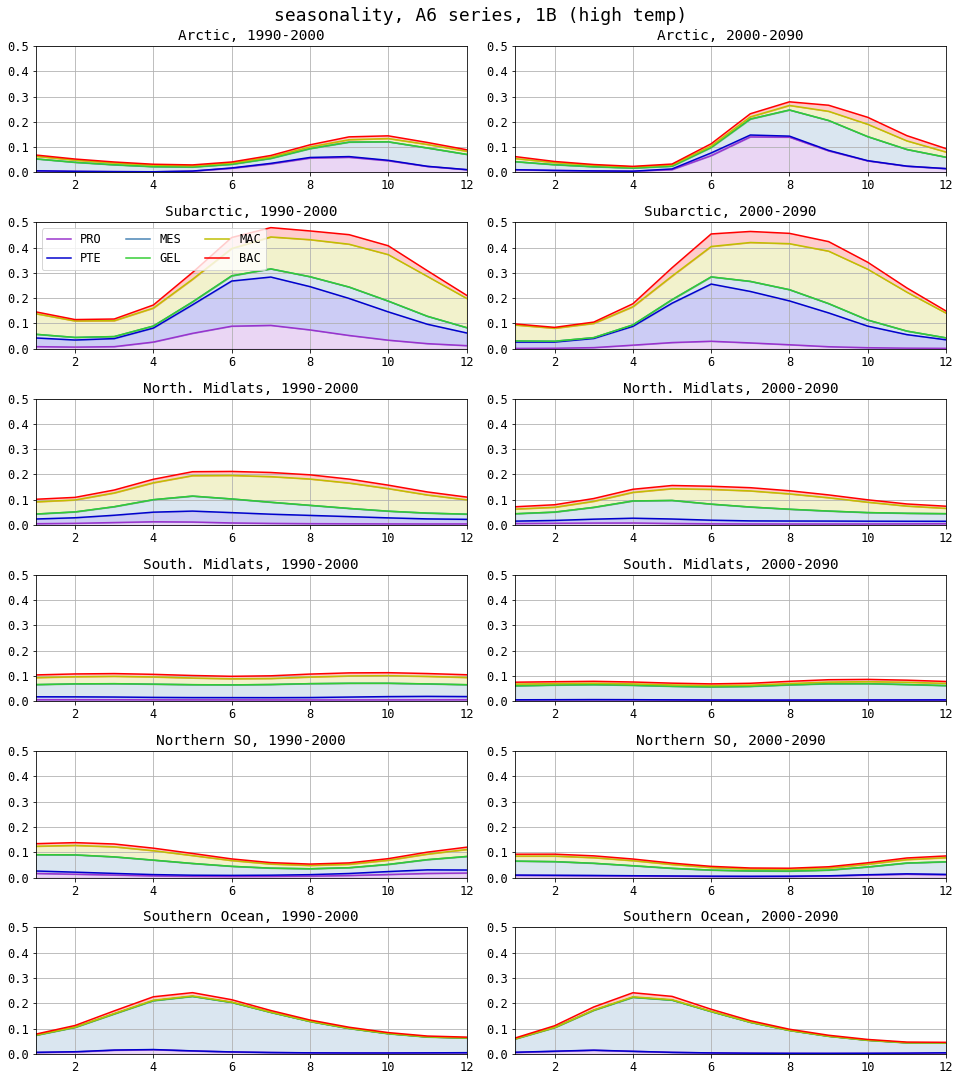

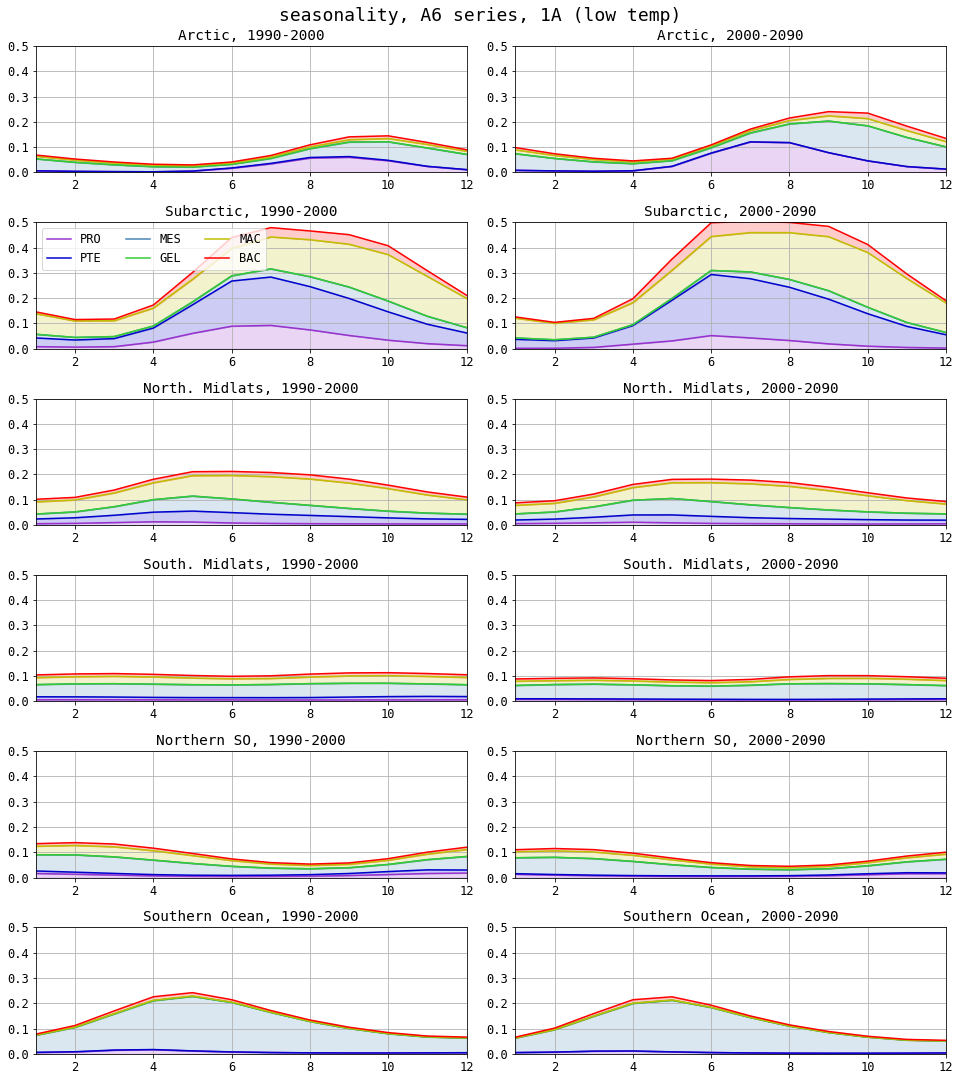

In [85]:
plot = True
top = 0.5
stit = 'seasonality, A6 series, 1B (high temp)'
ftit = 'zoo-seasonality-1BA6'
p1BA6_1990 = p1BA6.sel(time_counter=slice(f'1990-01-01', f'1999-12-31')).groupby('time_counter.month').mean()
p1BA6_2090 = p1BA6.sel(time_counter=slice(f'2090-01-01', f'2099-12-31')).groupby('time_counter.month').mean()

if plot:
    fact = 0.9
    fig, axs = plt.subplots(6,2, figsize=(15*fact, 17*fact), facecolor='w', edgecolor='k')
    axs = axs.ravel()

    tits = ['Arctic, 1990-2000', 'Arctic, 2000-2090',\
           'Subarctic, 1990-2000', 'Subarctic, 2000-2090',
           'North. Midlats, 1990-2000', 'North. Midlats, 2000-2090',
           'South. Midlats, 1990-2000', 'South. Midlats, 2000-2090',
           'Northern SO, 1990-2000', 'Northern SO, 2000-2090',
           'Southern Ocean, 1990-2000', 'Southern Ocean, 2000-2090',]

    for w in range(0,12):
        axs[w].grid()
        axs[w].set_xlim([1,12])
        axs[w].set_ylim([0,top])
        axs[w].set_title(tits[w])
        
    for i in range(1,7):
        year = p1BA6_1990.month ## terrible syntax lol
        PRO = p1BA6_1990.PRO.sel(lat_band = i).values
        PTE = p1BA6_1990.PTE.sel(lat_band = i).values
        MES = p1BA6_1990.MES.sel(lat_band = i).values
        GEL = p1BA6_1990.GEL.sel(lat_band = i).values
        MAC = p1BA6_1990.MAC.sel(lat_band = i).values
        BAC = p1BA6_1990.BAC.sel(lat_band = i).values
        
        axs[(i-1)*2].plot(year,PRO, color = 'darkorchid', label = 'PRO')
        axs[(i-1)*2].plot(year,PRO+PTE, color = 'mediumblue', label = 'PTE')
        axs[(i-1)*2].plot(year,PRO+PTE+MES, color = 'steelblue', label = 'MES')
        axs[(i-1)*2].plot(year,PRO+PTE+MES+GEL, color = 'limegreen', label = 'GEL')
        axs[(i-1)*2].plot(year,PRO+PTE+MES+GEL+MAC, color = 'y', label = 'MAC')
        axs[(i-1)*2].plot(year,PRO+PTE+MES+GEL+MAC+BAC, color = 'r', label = 'BAC')

        axs[(i-1)*2].fill_between(year,PRO, 0, color = 'darkorchid', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,PRO+PTE, PRO, color = 'mediumblue', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,PRO+PTE+MES, PRO+PTE, color = 'steelblue', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,PRO+PTE+MES+GEL, PRO+PTE+MES, color = 'limegreen', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,PRO+PTE+MES+GEL+MAC, PRO+PTE+MES+GEL, color = 'y', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,PRO+PTE+MES+GEL+MAC, PRO+PTE+MES+GEL+MAC, color = 'orange', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,PRO+PTE+MES+GEL+MAC+BAC, PRO+PTE+MES+GEL+MAC, color = 'r', alpha = 0.2)

    for i in range(1,7):
        year = p1BA6_2090.month ## terrible syntax lol
        PRO = p1BA6_2090.PRO.sel(lat_band = i).values
        PTE = p1BA6_2090.PTE.sel(lat_band = i).values
        MES = p1BA6_2090.MES.sel(lat_band = i).values
        GEL = p1BA6_2090.GEL.sel(lat_band = i).values
        MAC = p1BA6_2090.MAC.sel(lat_band = i).values
        PIC = p1BA6_2090.PIC.sel(lat_band = i).values
        BAC = p1BA6_2090.BAC.sel(lat_band = i).values
        
        axs[(i-1)*2+1].plot(year,PRO, color = 'darkorchid', label = 'PRO')
        axs[(i-1)*2+1].plot(year,PRO+PTE, color = 'mediumblue', label = 'PTE')
        axs[(i-1)*2+1].plot(year,PRO+PTE+MES, color = 'steelblue', label = 'MES')
        axs[(i-1)*2+1].plot(year,PRO+PTE+MES+GEL, color = 'limegreen', label = 'GEL')
        axs[(i-1)*2+1].plot(year,PRO+PTE+MES+GEL+MAC, color = 'y', label = 'MAC')
        axs[(i-1)*2+1].plot(year,PRO+PTE+MES+GEL+MAC+BAC, color = 'r', label = 'BAC')

        axs[(i-1)*2+1].fill_between(year,PRO, 0, color = 'darkorchid', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,PRO+PTE, PRO, color = 'mediumblue', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,PRO+PTE+MES, PRO+PTE, color = 'steelblue', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,PRO+PTE+MES+GEL, PRO+PTE+MES, color = 'limegreen', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,PRO+PTE+MES+GEL+MAC, PRO+PTE+MES+GEL, color = 'y', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,PRO+PTE+MES+GEL+MAC, PRO+PTE+MES+GEL+MAC, color = 'orange', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,PRO+PTE+MES+GEL+MAC+BAC, PRO+PTE+MES+GEL+MAC, color = 'r', alpha = 0.2)
    
    axs[2].legend(ncol = 3)
    plt.suptitle(stit, fontsize = 18)
    plt.tight_layout()
    fig.savefig(f'./plots/{ftit}.jpg')
    
plot = True
top = 0.5
stit = 'seasonality, A6 series, 1A (low temp)'
ftit = 'zoo-seasonality-1AA6'
p1AA6_1990 = p1AA6.sel(time_counter=slice(f'1990-01-01', f'1999-12-31')).groupby('time_counter.month').mean()
p1AA6_2090 = p1AA6.sel(time_counter=slice(f'2090-01-01', f'2099-12-31')).groupby('time_counter.month').mean()

if plot:
    fact = 0.9
    fig, axs = plt.subplots(6,2, figsize=(15*fact, 17*fact), facecolor='w', edgecolor='k')
    axs = axs.ravel()

    tits = ['Arctic, 1990-2000', 'Arctic, 2000-2090',\
           'Subarctic, 1990-2000', 'Subarctic, 2000-2090',
           'North. Midlats, 1990-2000', 'North. Midlats, 2000-2090',
           'South. Midlats, 1990-2000', 'South. Midlats, 2000-2090',
           'Northern SO, 1990-2000', 'Northern SO, 2000-2090',
           'Southern Ocean, 1990-2000', 'Southern Ocean, 2000-2090',]

    for w in range(0,12):
        axs[w].grid()
        axs[w].set_xlim([1,12])
        axs[w].set_ylim([0,top])
        axs[w].set_title(tits[w])
        
    for i in range(1,7):
        year = p1AA6_1990.month ## terrible syntax lol
        PRO = p1AA6_1990.PRO.sel(lat_band = i).values
        PTE = p1AA6_1990.PTE.sel(lat_band = i).values
        MES = p1AA6_1990.MES.sel(lat_band = i).values
        GEL = p1AA6_1990.GEL.sel(lat_band = i).values
        MAC = p1AA6_1990.MAC.sel(lat_band = i).values
        BAC = p1AA6_1990.BAC.sel(lat_band = i).values
        
        axs[(i-1)*2].plot(year,PRO, color = 'darkorchid', label = 'PRO')
        axs[(i-1)*2].plot(year,PRO+PTE, color = 'mediumblue', label = 'PTE')
        axs[(i-1)*2].plot(year,PRO+PTE+MES, color = 'steelblue', label = 'MES')
        axs[(i-1)*2].plot(year,PRO+PTE+MES+GEL, color = 'limegreen', label = 'GEL')
        axs[(i-1)*2].plot(year,PRO+PTE+MES+GEL+MAC, color = 'y', label = 'MAC')
        axs[(i-1)*2].plot(year,PRO+PTE+MES+GEL+MAC+BAC, color = 'r', label = 'BAC')

        axs[(i-1)*2].fill_between(year,PRO, 0, color = 'darkorchid', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,PRO+PTE, PRO, color = 'mediumblue', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,PRO+PTE+MES, PRO+PTE, color = 'steelblue', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,PRO+PTE+MES+GEL, PRO+PTE+MES, color = 'limegreen', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,PRO+PTE+MES+GEL+MAC, PRO+PTE+MES+GEL, color = 'y', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,PRO+PTE+MES+GEL+MAC, PRO+PTE+MES+GEL+MAC, color = 'orange', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,PRO+PTE+MES+GEL+MAC+BAC, PRO+PTE+MES+GEL+MAC, color = 'r', alpha = 0.2)

    for i in range(1,7):
        year = p1AA6_2090.month ## terrible syntax lol
        PRO = p1AA6_2090.PRO.sel(lat_band = i).values
        PTE = p1AA6_2090.PTE.sel(lat_band = i).values
        MES = p1AA6_2090.MES.sel(lat_band = i).values
        GEL = p1AA6_2090.GEL.sel(lat_band = i).values
        MAC = p1AA6_2090.MAC.sel(lat_band = i).values
        PIC = p1AA6_2090.PIC.sel(lat_band = i).values
        BAC = p1AA6_2090.BAC.sel(lat_band = i).values
        
        axs[(i-1)*2+1].plot(year,PRO, color = 'darkorchid', label = 'PRO')
        axs[(i-1)*2+1].plot(year,PRO+PTE, color = 'mediumblue', label = 'PTE')
        axs[(i-1)*2+1].plot(year,PRO+PTE+MES, color = 'steelblue', label = 'MES')
        axs[(i-1)*2+1].plot(year,PRO+PTE+MES+GEL, color = 'limegreen', label = 'GEL')
        axs[(i-1)*2+1].plot(year,PRO+PTE+MES+GEL+MAC, color = 'y', label = 'MAC')
        axs[(i-1)*2+1].plot(year,PRO+PTE+MES+GEL+MAC+BAC, color = 'r', label = 'BAC')

        axs[(i-1)*2+1].fill_between(year,PRO, 0, color = 'darkorchid', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,PRO+PTE, PRO, color = 'mediumblue', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,PRO+PTE+MES, PRO+PTE, color = 'steelblue', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,PRO+PTE+MES+GEL, PRO+PTE+MES, color = 'limegreen', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,PRO+PTE+MES+GEL+MAC, PRO+PTE+MES+GEL, color = 'y', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,PRO+PTE+MES+GEL+MAC, PRO+PTE+MES+GEL+MAC, color = 'orange', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,PRO+PTE+MES+GEL+MAC+BAC, PRO+PTE+MES+GEL+MAC, color = 'r', alpha = 0.2)
    
    axs[2].legend(ncol = 3)
    plt.suptitle(stit, fontsize = 18)
    plt.tight_layout()
    fig.savefig(f'./plots/{ftit}.jpg')

In [ ]:
plot = True
top = 0.5
stit = 'seasonality, SA series, 1B (high temp)'
ftit = 'zoo-seasonality-1BSA'
p1BSA_1990 = p1BSA.sel(time_counter=slice(f'1990-01-01', f'1999-12-31')).groupby('time_counter.month').mean()
p1BSA_2090 = p1BSA.sel(time_counter=slice(f'2090-01-01', f'2099-12-31')).groupby('time_counter.month').mean()

if plot:
    fact = 0.9
    fig, axs = plt.subplots(6,2, figsize=(15*fact, 17*fact), facecolor='w', edgecolor='k')
    axs = axs.ravel()

    tits = ['Arctic, 1990-2000', 'Arctic, 2000-2090',\
           'Subarctic, 1990-2000', 'Subarctic, 2000-2090',
           'North. Midlats, 1990-2000', 'North. Midlats, 2000-2090',
           'South. Midlats, 1990-2000', 'South. Midlats, 2000-2090',
           'Northern SO, 1990-2000', 'Northern SO, 2000-2090',
           'Southern Ocean, 1990-2000', 'Southern Ocean, 2000-2090',]

    for w in range(0,12):
        axs[w].grid()
        axs[w].set_xlim([1,12])
        axs[w].set_ylim([0,top])
        axs[w].set_title(tits[w])
        
    for i in range(1,7):
        year = p1BSA_1990.month ## terrible syntax lol
        PRO = p1BSA_1990.PRO.sel(lat_band = i).values
        PTE = p1BSA_1990.PTE.sel(lat_band = i).values
        MES = p1BSA_1990.MES.sel(lat_band = i).values
        GEL = p1BSA_1990.GEL.sel(lat_band = i).values
        MAC = p1BSA_1990.MAC.sel(lat_band = i).values
        BAC = p1BSA_1990.BAC.sel(lat_band = i).values
        
        axs[(i-1)*2].plot(year,PRO, color = 'darkorchid', label = 'PRO')
        axs[(i-1)*2].plot(year,PRO+PTE, color = 'mediumblue', label = 'PTE')
        axs[(i-1)*2].plot(year,PRO+PTE+MES, color = 'steelblue', label = 'MES')
        axs[(i-1)*2].plot(year,PRO+PTE+MES+GEL, color = 'limegreen', label = 'GEL')
        axs[(i-1)*2].plot(year,PRO+PTE+MES+GEL+MAC, color = 'y', label = 'MAC')
        axs[(i-1)*2].plot(year,PRO+PTE+MES+GEL+MAC+BAC, color = 'r', label = 'BAC')

        axs[(i-1)*2].fill_between(year,PRO, 0, color = 'darkorchid', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,PRO+PTE, PRO, color = 'mediumblue', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,PRO+PTE+MES, PRO+PTE, color = 'steelblue', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,PRO+PTE+MES+GEL, PRO+PTE+MES, color = 'limegreen', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,PRO+PTE+MES+GEL+MAC, PRO+PTE+MES+GEL, color = 'y', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,PRO+PTE+MES+GEL+MAC, PRO+PTE+MES+GEL+MAC, color = 'orange', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,PRO+PTE+MES+GEL+MAC+BAC, PRO+PTE+MES+GEL+MAC, color = 'r', alpha = 0.2)

    for i in range(1,7):
        year = p1BSA_2090.month ## terrible syntax lol
        PRO = p1BSA_2090.PRO.sel(lat_band = i).values
        PTE = p1BSA_2090.PTE.sel(lat_band = i).values
        MES = p1BSA_2090.MES.sel(lat_band = i).values
        GEL = p1BSA_2090.GEL.sel(lat_band = i).values
        MAC = p1BSA_2090.MAC.sel(lat_band = i).values
        PIC = p1BSA_2090.PIC.sel(lat_band = i).values
        BAC = p1BSA_2090.BAC.sel(lat_band = i).values
        
        axs[(i-1)*2+1].plot(year,PRO, color = 'darkorchid', label = 'PRO')
        axs[(i-1)*2+1].plot(year,PRO+PTE, color = 'mediumblue', label = 'PTE')
        axs[(i-1)*2+1].plot(year,PRO+PTE+MES, color = 'steelblue', label = 'MES')
        axs[(i-1)*2+1].plot(year,PRO+PTE+MES+GEL, color = 'limegreen', label = 'GEL')
        axs[(i-1)*2+1].plot(year,PRO+PTE+MES+GEL+MAC, color = 'y', label = 'MAC')
        axs[(i-1)*2+1].plot(year,PRO+PTE+MES+GEL+MAC+BAC, color = 'r', label = 'BAC')

        axs[(i-1)*2+1].fill_between(year,PRO, 0, color = 'darkorchid', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,PRO+PTE, PRO, color = 'mediumblue', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,PRO+PTE+MES, PRO+PTE, color = 'steelblue', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,PRO+PTE+MES+GEL, PRO+PTE+MES, color = 'limegreen', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,PRO+PTE+MES+GEL+MAC, PRO+PTE+MES+GEL, color = 'y', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,PRO+PTE+MES+GEL+MAC, PRO+PTE+MES+GEL+MAC, color = 'orange', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,PRO+PTE+MES+GEL+MAC+BAC, PRO+PTE+MES+GEL+MAC, color = 'r', alpha = 0.2)
    
    axs[2].legend(ncol = 3)
    plt.suptitle(stit, fontsize = 18)
    plt.tight_layout()
    fig.savefig(f'./plots/{ftit}.jpg')
    
plot = True
top = 0.5
stit = 'seasonality, SA series, 1A (low temp)'
ftit = 'zoo-seasonality-1ASA'
p1ASA_1990 = p1ASA.sel(time_counter=slice(f'1990-01-01', f'1999-12-31')).groupby('time_counter.month').mean()
p1ASA_2090 = p1ASA.sel(time_counter=slice(f'2090-01-01', f'2099-12-31')).groupby('time_counter.month').mean()

if plot:
    fact = 0.9
    fig, axs = plt.subplots(6,2, figsize=(15*fact, 17*fact), facecolor='w', edgecolor='k')
    axs = axs.ravel()

    tits = ['Arctic, 1990-2000', 'Arctic, 2000-2090',\
           'Subarctic, 1990-2000', 'Subarctic, 2000-2090',
           'North. Midlats, 1990-2000', 'North. Midlats, 2000-2090',
           'South. Midlats, 1990-2000', 'South. Midlats, 2000-2090',
           'Northern SO, 1990-2000', 'Northern SO, 2000-2090',
           'Southern Ocean, 1990-2000', 'Southern Ocean, 2000-2090',]

    for w in range(0,12):
        axs[w].grid()
        axs[w].set_xlim([1,12])
        axs[w].set_ylim([0,top])
        axs[w].set_title(tits[w])
        
    for i in range(1,7):
        year = p1ASA_1990.month ## terrible syntax lol
        PRO = p1ASA_1990.PRO.sel(lat_band = i).values
        PTE = p1ASA_1990.PTE.sel(lat_band = i).values
        MES = p1ASA_1990.MES.sel(lat_band = i).values
        GEL = p1ASA_1990.GEL.sel(lat_band = i).values
        MAC = p1ASA_1990.MAC.sel(lat_band = i).values
        BAC = p1ASA_1990.BAC.sel(lat_band = i).values
        
        axs[(i-1)*2].plot(year,PRO, color = 'darkorchid', label = 'PRO')
        axs[(i-1)*2].plot(year,PRO+PTE, color = 'mediumblue', label = 'PTE')
        axs[(i-1)*2].plot(year,PRO+PTE+MES, color = 'steelblue', label = 'MES')
        axs[(i-1)*2].plot(year,PRO+PTE+MES+GEL, color = 'limegreen', label = 'GEL')
        axs[(i-1)*2].plot(year,PRO+PTE+MES+GEL+MAC, color = 'y', label = 'MAC')
        axs[(i-1)*2].plot(year,PRO+PTE+MES+GEL+MAC+BAC, color = 'r', label = 'BAC')

        axs[(i-1)*2].fill_between(year,PRO, 0, color = 'darkorchid', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,PRO+PTE, PRO, color = 'mediumblue', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,PRO+PTE+MES, PRO+PTE, color = 'steelblue', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,PRO+PTE+MES+GEL, PRO+PTE+MES, color = 'limegreen', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,PRO+PTE+MES+GEL+MAC, PRO+PTE+MES+GEL, color = 'y', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,PRO+PTE+MES+GEL+MAC, PRO+PTE+MES+GEL+MAC, color = 'orange', alpha = 0.2)
        axs[(i-1)*2].fill_between(year,PRO+PTE+MES+GEL+MAC+BAC, PRO+PTE+MES+GEL+MAC, color = 'r', alpha = 0.2)

    for i in range(1,7):
        year = p1ASA_2090.month ## terrible syntax lol
        PRO = p1ASA_2090.PRO.sel(lat_band = i).values
        PTE = p1ASA_2090.PTE.sel(lat_band = i).values
        MES = p1ASA_2090.MES.sel(lat_band = i).values
        GEL = p1ASA_2090.GEL.sel(lat_band = i).values
        MAC = p1ASA_2090.MAC.sel(lat_band = i).values
        PIC = p1ASA_2090.PIC.sel(lat_band = i).values
        BAC = p1ASA_2090.BAC.sel(lat_band = i).values
        
        axs[(i-1)*2+1].plot(year,PRO, color = 'darkorchid', label = 'PRO')
        axs[(i-1)*2+1].plot(year,PRO+PTE, color = 'mediumblue', label = 'PTE')
        axs[(i-1)*2+1].plot(year,PRO+PTE+MES, color = 'steelblue', label = 'MES')
        axs[(i-1)*2+1].plot(year,PRO+PTE+MES+GEL, color = 'limegreen', label = 'GEL')
        axs[(i-1)*2+1].plot(year,PRO+PTE+MES+GEL+MAC, color = 'y', label = 'MAC')
        axs[(i-1)*2+1].plot(year,PRO+PTE+MES+GEL+MAC+BAC, color = 'r', label = 'BAC')

        axs[(i-1)*2+1].fill_between(year,PRO, 0, color = 'darkorchid', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,PRO+PTE, PRO, color = 'mediumblue', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,PRO+PTE+MES, PRO+PTE, color = 'steelblue', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,PRO+PTE+MES+GEL, PRO+PTE+MES, color = 'limegreen', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,PRO+PTE+MES+GEL+MAC, PRO+PTE+MES+GEL, color = 'y', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,PRO+PTE+MES+GEL+MAC, PRO+PTE+MES+GEL+MAC, color = 'orange', alpha = 0.2)
        axs[(i-1)*2+1].fill_between(year,PRO+PTE+MES+GEL+MAC+BAC, PRO+PTE+MES+GEL+MAC, color = 'r', alpha = 0.2)
    
    axs[2].legend(ncol = 3)
    plt.suptitle(stit, fontsize = 18)
    plt.tight_layout()
    fig.savefig(f'./plots/{ftit}.jpg')